In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [7]:
img = cv.imread('test_picture.JPG',0)
img_2 = cv.imread('test_picture_2.JPG',0)

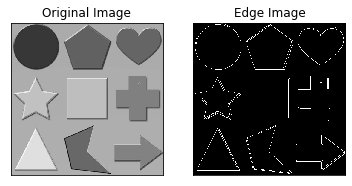

In [8]:
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

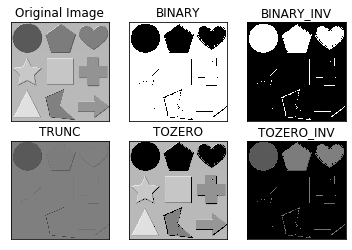

In [9]:
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

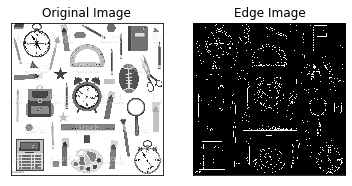

In [11]:
edges = cv.Canny(img_2,100,200)
plt.subplot(121),plt.imshow(img_2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

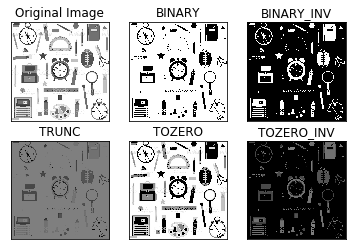

In [10]:
ret,thresh1 = cv.threshold(img_2,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img_2,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img_2,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img_2,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img_2,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_2, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [3]:
img = cv.imread('test_picture.JPG')
img_gray = cv.imread('test_picture.JPG', 0)

In [11]:
import cv2 as cv
import numpy as np

img = cv.imread('test_picture.JPG')
img_gray = cv.imread('test_picture.JPG', 0)

ret, thresh = cv.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(img, contours, -1, (0, 255, 0), 3)

cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
import numpy as np

import cv2

img = cv2.imread('loadtest.png', 0)

result_fill = np.ones(img.shape, np.uint8) * 255
result_borders = np.zeros(img.shape, np.uint8)

# the '[:-1]' is used to skip the contour at the outer border of the image
contours = cv2.findContours(img, cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_SIMPLE)[0][:-1]

# fill spaces between contours by setting thickness to -1
cv2.drawContours(result_fill, contours, -1, 0, -1)
cv2.drawContours(result_borders, contours, -1, 255, 1)

# xor the filled result and the borders to recreate the original image
result = result_fill ^ result_borders

# prints True: the result is now exactly the same as the original
print(np.array_equal(result, img))

cv2.imwrite('contours.png', result)

True


True

In [14]:
import numpy as np
from skimage.measure import approximate_polygon, find_contours

import cv2

img = cv2.imread('loadtest.png', 0)
contours = find_contours(img, 0)

result_contour = np.zeros(img.shape + (3, ), np.uint8)
result_polygon1 = np.zeros(img.shape + (3, ), np.uint8)
result_polygon2 = np.zeros(img.shape + (3, ), np.uint8)

for contour in contours:
    print('Contour shape:', contour.shape)

    # reduce the number of lines by approximating polygons
    polygon1 = approximate_polygon(contour, tolerance=2.5)
    print('Polygon 1 shape:', polygon1.shape)

    # increase tolerance to further reduce number of lines
    polygon2 = approximate_polygon(contour, tolerance=25)
    print('Polygon 2 shape:', polygon2.shape)

    contour = contour.astype(np.int).tolist()
    polygon1 = polygon1.astype(np.int).tolist()
    polygon2 = polygon2.astype(np.int).tolist()

    # draw contour lines
    for idx, coords in enumerate(contour[:-1]):
        y1, x1, y2, x2 = coords + contour[idx + 1]
        result_contour = cv2.line(result_contour, (x1, y1), (x2, y2),
                                  (0, 255, 0), 1)
    # draw polygon 1 lines
    for idx, coords in enumerate(polygon1[:-1]):
        y1, x1, y2, x2 = coords + polygon1[idx + 1]
        result_polygon1 = cv2.line(result_polygon1, (x1, y1), (x2, y2),
                                   (0, 255, 0), 1)
    # draw polygon 2 lines
    for idx, coords in enumerate(polygon2[:-1]):
        y1, x1, y2, x2 = coords + polygon2[idx + 1]
        result_polygon2 = cv2.line(result_polygon2, (x1, y1), (x2, y2),
                                   (0, 255, 0), 1)

cv2.imwrite('contour_lines.png', result_contour)
cv2.imwrite('polygon1_lines.png', result_polygon1)
cv2.imwrite('polygon2_lines.png', result_polygon2)

Contour shape: (849, 2)
Polygon 1 shape: (28, 2)
Polygon 2 shape: (9, 2)
Contour shape: (825, 2)
Polygon 1 shape: (31, 2)
Polygon 2 shape: (9, 2)
Contour shape: (1457, 2)
Polygon 1 shape: (9, 2)
Polygon 2 shape: (6, 2)
Contour shape: (879, 2)
Polygon 1 shape: (5, 2)
Polygon 2 shape: (5, 2)
Contour shape: (973, 2)
Polygon 1 shape: (5, 2)
Polygon 2 shape: (5, 2)
Contour shape: (224, 2)
Polygon 1 shape: (4, 2)
Polygon 2 shape: (4, 2)
Contour shape: (825, 2)
Polygon 1 shape: (13, 2)
Polygon 2 shape: (13, 2)
Contour shape: (781, 2)
Polygon 1 shape: (13, 2)
Polygon 2 shape: (13, 2)


True

In [ ]:
class Container:
    def __init__(self):
        self.neurons: list = []
        self.connections: list = []
            
    def get_incoming_connections(self, neuron):
        return [c for c in self.connections if c.target == neuron]

    def get_outgoing_connections(self, neuron):
        return [c for c in self.connections if c.source == neuron]
    
container = Container()

In [ ]:
class Connection:
    def __init__(self, source: 'Neuron', target: 'Neuron'):
        self.source = source
        self.target = target
        self.pulsing = False
        
    def update(self):
        if self.pulsing:
            self.target.potential += 1

In [ ]:
class Neuron:
    def __init__(self):
        self.threshold = 2
        self.firing: bool = False
        self.potential = 0

    def update(self, tick: int):
        if self.potential >= self.threshold:
            self.firing = True

    def fire(self):
        connections = container.get_outgoing_connections(self)
        for c in connections:
            c.pulsing = True

Number of coordinates: 22 704 26
Number of coordinates: 1173 32 9
Number of coordinates: 701 21 5


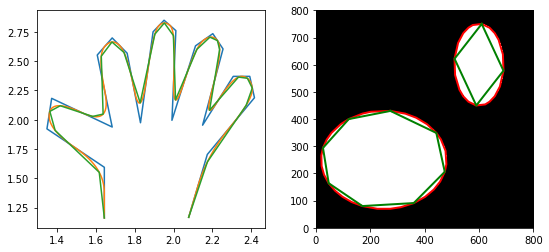

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon


hand = np.array([[1.64516129, 1.16145833],
                 [1.64516129, 1.59375],
                 [1.35080645, 1.921875],
                 [1.375, 2.18229167],
                 [1.68548387, 1.9375],
                 [1.60887097, 2.55208333],
                 [1.68548387, 2.69791667],
                 [1.76209677, 2.56770833],
                 [1.83064516, 1.97395833],
                 [1.89516129, 2.75],
                 [1.9516129, 2.84895833],
                 [2.01209677, 2.76041667],
                 [1.99193548, 1.99479167],
                 [2.11290323, 2.63020833],
                 [2.2016129, 2.734375],
                 [2.25403226, 2.60416667],
                 [2.14919355, 1.953125],
                 [2.30645161, 2.36979167],
                 [2.39112903, 2.36979167],
                 [2.41532258, 2.1875],
                 [2.1733871, 1.703125],
                 [2.07782258, 1.16666667]])

# subdivide polygon using 2nd degree B-Splines
new_hand = hand.copy()
for _ in range(5):
    new_hand = subdivide_polygon(new_hand, degree=2, preserve_ends=True)

# approximate subdivided polygon with Douglas-Peucker algorithm
appr_hand = approximate_polygon(new_hand, tolerance=0.02)

print("Number of coordinates:", len(hand), len(new_hand), len(appr_hand))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

ax1.plot(hand[:, 0], hand[:, 1])
ax1.plot(new_hand[:, 0], new_hand[:, 1])
ax1.plot(appr_hand[:, 0], appr_hand[:, 1])


# create two ellipses in image
img = np.zeros((800, 800), 'int32')
rr, cc = ellipse(250, 250, 180, 230, img.shape)
img[rr, cc] = 1
rr, cc = ellipse(600, 600, 150, 90, img.shape)
img[rr, cc] = 1

plt.gray()
ax2.imshow(img)

# approximate / simplify coordinates of the two ellipses
for contour in find_contours(img, 0):
    coords = approximate_polygon(contour, tolerance=2.5)
    ax2.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    coords2 = approximate_polygon(contour, tolerance=39.5)
    ax2.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
    print("Number of coordinates:", len(contour), len(coords), len(coords2))

ax2.axis((0, 800, 0, 800))

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

In [2]:
hand = np.array([[1.64516129, 1.16145833],
                 [1.64516129, 1.59375],
                 [1.35080645, 1.921875],
                 [1.375, 2.18229167],
                 [1.68548387, 1.9375],
                 [1.60887097, 2.55208333],
                 [1.68548387, 2.69791667],
                 [1.76209677, 2.56770833],
                 [1.83064516, 1.97395833],
                 [1.89516129, 2.75],
                 [1.9516129, 2.84895833],
                 [2.01209677, 2.76041667],
                 [1.99193548, 1.99479167],
                 [2.11290323, 2.63020833],
                 [2.2016129, 2.734375],
                 [2.25403226, 2.60416667],
                 [2.14919355, 1.953125],
                 [2.30645161, 2.36979167],
                 [2.39112903, 2.36979167],
                 [2.41532258, 2.1875],
                 [2.1733871, 1.703125],
                 [2.07782258, 1.16666667]])

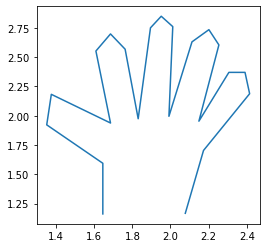

In [8]:
fig, (ax1) = plt.subplots(figsize=(4, 4))

ax1.plot(hand[:, 0], hand[:, 1])

plt.show()

In [9]:
# subdivide polygon using 2nd degree B-Splines
new_hand = hand.copy()
for _ in range(5):
    new_hand = subdivide_polygon(new_hand, degree=2, preserve_ends=True)

In [10]:
len(new_hand)

704

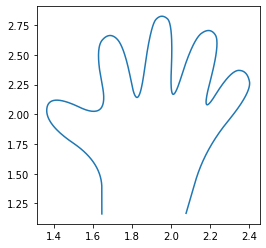

In [11]:
fig, (ax1) = plt.subplots(figsize=(4, 4))

ax1.plot(new_hand[:, 0], new_hand[:, 1])

plt.show()

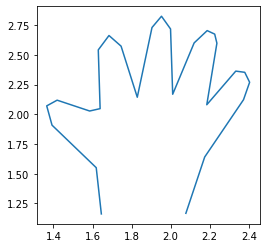

In [12]:
# approximate subdivided polygon with Douglas-Peucker algorithm
appr_hand = approximate_polygon(new_hand, tolerance=0.02)

fig, (ax1) = plt.subplots(figsize=(4, 4))

ax1.plot(appr_hand[:, 0], appr_hand[:, 1])

plt.show()

In [13]:
len(appr_hand)

26

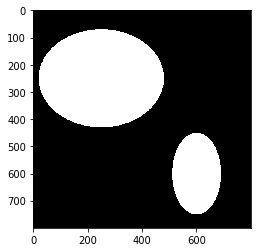

In [58]:
# create two ellipses in image
img = np.zeros((800, 800), 'int32')
rr, cc = ellipse(250, 250, 180, 230, img.shape)
img[rr, cc] = 1
rr, cc = ellipse(600, 600, 150, 90, img.shape)
img[rr, cc] = 1

fig, (ax1) = plt.subplots(figsize=(4, 4))
plt.gray()
ax1.imshow(img)

Number of coordinates: 1173 32 9
Number of coordinates: 701 21 5


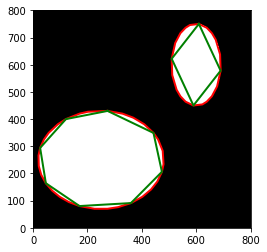

In [59]:
fig, (ax1) = plt.subplots(figsize=(4, 4))
plt.gray()
ax1.imshow(img)

# approximate / simplify coordinates of the two ellipses
for contour in find_contours(img, 0):
    coords = approximate_polygon(contour, tolerance=2.5)
    ax1.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    coords2 = approximate_polygon(contour, tolerance=39.5)
    ax1.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
    print("Number of coordinates:", len(contour), len(coords), len(coords2))

ax1.axis((0, 800, 0, 800))

plt.show()

In [62]:
find_contours(img, 0)

[array([[430., 274.],
        [430., 273.],
        [430., 272.],
        ...,
        [429., 276.],
        [429., 275.],
        [430., 274.]]),
 array([[750., 610.],
        [750., 609.],
        [750., 608.],
        ...,
        [749., 612.],
        [749., 611.],
        [750., 610.]])]

In [67]:
hand = np.array([[1.64516129, 1.16145833],
                 [1.64516129, 1.59375],
                 [1.35080645, 1.921875],
                 [1.375, 2.18229167],
                 [1.68548387, 1.9375],
                 [1.60887097, 2.55208333],
                 [1.68548387, 2.69791667],
                 [1.76209677, 2.56770833],
                 [1.83064516, 1.97395833],
                 [1.89516129, 2.75],
                 [1.9516129, 2.84895833],
                 [2.01209677, 2.76041667],
                 [1.99193548, 1.99479167],
                 [2.11290323, 2.63020833],
                 [2.2016129, 2.734375],
                 [2.25403226, 2.60416667],
                 [2.14919355, 1.953125],
                 [2.30645161, 2.36979167],
                 [2.39112903, 2.36979167],
                 [2.41532258, 2.1875],
                 [2.1733871, 1.703125],
                 [2.07782258, 1.16666667]])

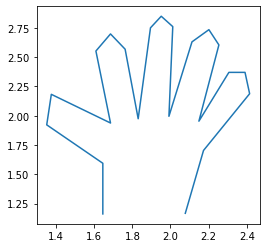

In [77]:
fig,(ax1) = plt.subplots(figsize=(4, 4))

ax1.plot(hand[:, 0], hand[:, 1])

plt.show()

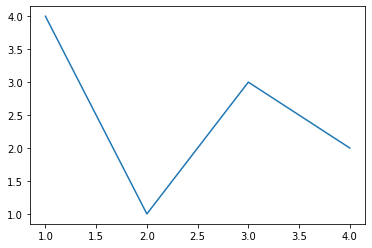

In [86]:
x_values = [1,2,3,4]
y_values = [4,1,3,2]

plt.plot(x_values, y_values)

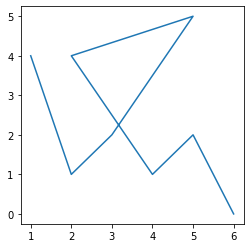

In [128]:
line = np.array([[1, 4],
                 [2, 1], 
                 [3, 2], 
                 [5, 5], 
                 [2, 4],
                 [4, 1], 
                 [5, 2], 
                 [6, 0]])

fig,(ax1) = plt.subplots(figsize=(4, 4))

ax1.plot(line[:,0], line[:,1])

plt.show()

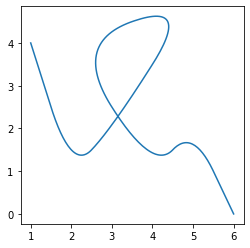

In [139]:
line = np.array([[1, 4],
                 [2, 1], 
                 [3, 2], 
                 [5, 5], 
                 [2, 4],
                 [4, 1], 
                 [5, 2], 
                 [6, 0]])

for _ in range(5):
    line = subdivide_polygon(line, degree=2, preserve_ends=True)

fig,(ax1) = plt.subplots(figsize=(4, 4))

ax1.plot(line[:,0], line[:,1])

plt.show()